# Random Forest  with Adult DB

## Imports

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading Data & printing shapes

In [44]:
df = pd.read_csv("adult.csv")

## Data exploration
First data visualisation without any pre-processing on it.
Printing 10 first images from the training set. 

In [45]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [47]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [48]:
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
y = df['income']
X = df[columns]

## Data Traitement

In [49]:
#create matrix X and target vector y
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
temp1=df['workclass']
labels, uniques=pd.factorize(temp1)
X0=np.array(labels) #workclass

temp1=df['educational-num']
labels, uniques=pd.factorize(temp1)
X1=np.array(labels) #educational-num

temp1=df['marital-status']
labels, uniques=pd.factorize(temp1)
X2=np.array(labels) #marital-status

temp1=df['occupation']
labels, uniques=pd.factorize(temp1)
X3=np.array(labels) #occupation

temp1=df['relationship']
labels, uniques=pd.factorize(temp1)
X4=np.array(labels) #relationship

temp1=df['race']
labels, uniques=pd.factorize(temp1)
X5=np.array(labels) #race

temp1=df['gender']
labels, uniques=pd.factorize(temp1)
X6=np.array(labels) #gender

temp1=df['native-country']
labels, uniques=pd.factorize(temp1)
X7=np.array(labels) #native-country

y = df['income']
X = df[columns]
n,m = X.shape 
print(X.shape)
X0=X0.reshape(n,1)
X1=X1.reshape(n,1)
X2=X2.reshape(n,1)
X3=X3.reshape(n,1)
X4=X4.reshape(n,1)
X5=X5.reshape(n,1)
X6=X6.reshape(n,1)
X7=X7.reshape(n,1)

X=np.hstack((X,X0))
X=np.hstack((X,X1))
X=np.hstack((X,X2))
X=np.hstack((X,X3))
X=np.hstack((X,X4))
X=np.hstack((X,X5))
X=np.hstack((X,X6))
X=np.hstack((X,X7))
print(X.shape)

(48842, 6)
(48842, 14)


In [50]:
from sklearn import preprocessing,cross_validation,neighbors
import pandas as pd
#split into train and test
split = 0.2
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=split,random_state=21)

# RF: Training our model

In [51]:
import random
from sklearn import ensemble
n_samples=len(x_train)
n_samples2=len(x_test)

x=np.array(x_train).reshape(n_samples,-1)
y=np.array(y_train)
#x=X.numpy()
#y=Y.numpy()
print(x.shape)
print(y.shape)
xt=np.array(x_test).reshape(n_samples2,-1)
yt=np.array(y_test)

#xt=X2.numpy()
#yt=Y2.numpy()
print(xt.shape)
print(yt.shape)

(39073, 14)
(39073,)
(9769, 14)
(9769,)


In [52]:
sample_index=random.sample(range(len(x)),int(len(x)/5))
valid_index=[i for i in range(len(x)) if i not in sample_index]
print(len(sample_index))
print(len(valid_index))

7814
31259


In [53]:
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]
print(len(sample_images))
print(len(valid_images))

7814
31259


In [54]:
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,20,30,40,50]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['log2', 'sqrt']}


In [56]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ensemble.RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, refit='AUC', return_train_score=True, n_jobs = -1)
# Fit the random search model
rf_random.fit(sample_images, sample_target)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring=None, verbose=0)

In [57]:
print("Best estimator found by grid search:")
print(rf_random.best_estimator_)

Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [58]:
n_tree=[10,20,30,40,50]
ascore=[]
for n in n_tree:
    classifier=ensemble.RandomForestClassifier(n_estimators=n,max_features="sqrt")
    classifier.fit(sample_images,sample_target)
    ascore.append(classifier.score(valid_images,valid_target))
print('Scores:',ascore)


Scores: [0.8423813941584823, 0.8475958923829937, 0.8483956620493298, 0.8463802424901629, 0.8487155699158643]


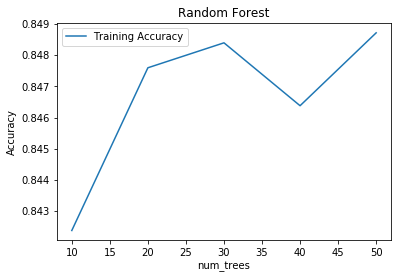

In [59]:
#Generate plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Random Forest')
plt.plot(n_tree, ascore, label='Training Accuracy')
plt.legend()
plt.xlabel('num_trees')
plt.ylabel('Accuracy')
plt.show()

In [64]:
classifier=ensemble.RandomForestClassifier(n_estimators=30,max_features="sqrt")

In [65]:
classifier.fit(xt,yt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
y_pred=classifier.predict(xt)

In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(yt, y_pred)))

Accuracy: 0.9987716245265637
